# Sprint 機械学習スクラッチ ロジスティック回帰

**Sprintの目的**

- スクラッチを通してロジスティック回帰を理解する
- 分類問題についての基礎を学ぶ

**どのように学ぶか**

スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。

## 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Sprint3で使った仮のデータで動きをテストしてみる
X = np.array([[2, 2 ,5 ,8], [3, 7, 3, 4], [4, 5, 4, 6], [5, 2, 3, 4], [6, 2, 3, 4], [7, 2, 3, 4]])
X

array([[2, 2, 5, 8],
       [3, 7, 3, 4],
       [4, 5, 4, 6],
       [5, 2, 3, 4],
       [6, 2, 3, 4],
       [7, 2, 3, 4]])

In [5]:
# バイアスがかかっている場合、Xの最前列に1を入れる
X = np.hstack([np.ones([X.shape[0], 1]), X])
X

array([[1., 2., 2., 5., 8.],
       [1., 3., 7., 3., 4.],
       [1., 4., 5., 4., 6.],
       [1., 5., 2., 3., 4.],
       [1., 6., 2., 3., 4.],
       [1., 7., 2., 3., 4.]])

In [6]:
# 0 ~ 1からランダムな数字でthetaを作成(内積求めるため、thetaの列数はXの行数に合わせる)
theta = np.random.rand(len(X[0]))
theta

array([0.75917707, 0.19183332, 0.21635803, 0.94568144, 0.28541801])

In [8]:
# 線形回帰の仮定関数(Sprint3の仮定関数)
hx = np.dot(X, theta.T) 
hx

array([8.58731105, 6.82789956, 8.10353429, 6.12977606, 6.32160938,
       6.51344269])

In [9]:
# シグモイド関数
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [10]:
yp = sigmoid(hx)
yp

array([0.99981358, 0.99891804, 0.99969762, 0.99782766, 0.99820617,
       0.99851883])

In [12]:
# ロジスティック回帰の仮定関数:線形回帰の仮定関数をシグモイド関数に通したもの
y_s = 1 / (1 + np.exp(-hx))
y_s

array([0.99981358, 0.99891804, 0.99969762, 0.99782766, 0.99820617,
       0.99851883])

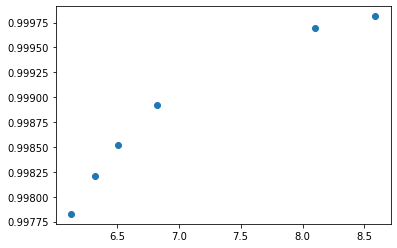

In [14]:
plt.scatter(hx,y_s)

In [29]:
# 少し大きいデータで試してみる

hx02 = np.arange(-200, 200, 0.2)
y_s02 = 1 / (1 + np.exp(-hx02))

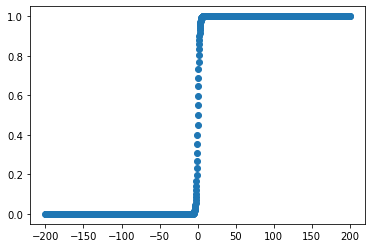

In [30]:
plt.scatter(hx02,y_s02)

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。

In [ ]:
# DIVERにある公式を用いて、パラメータの更新式を実装してみる
# lamb:正則化パラメータ(lambda) 一旦0.01に設定
# alpha:学習率 一旦0.01に設定
# sprint3のθ更新式(alpha * np.dot((yp - y) ,X) / X.shape[0])＋正則化項（lamb * theta / X.shape[0]）
# 予測値のypについて、0.5以上が1、それ以下が0と予め変換しておく必要がある

# パラメータの更新式
# theta = theta - alpha * np.dot((yp - y) ,X) / X.shape[0] + lamb * theta / X.shape[0]

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

In [ ]:
# predictメソッド：仮定関数で予測した値から０，１分類（0.5以上が1、それ以下が0）
              
# predict = np.dot(X, theta.T)
# np.where(predict > 0.5, 1, 0)

In [ ]:
# predict_probaメソッド：仮定関数で予測した確率
              
# predict_proba = np.dot(X, theta.T)

## 【問題4】目的関数
ロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。

In [ ]:
# 損失関数の式に沿って実装
# クロスエントロピー損失関数の式
# cross_entropy_loss = np.sum((- y * np.log(yp)) - (1 - yp) * np.log(1 - yp)) / X.shape[0]

# 正則化項（重み減衰weight decay）の式
# バイアスがかかっている場合は１が追加されたため、処理が分かれる
# if bias = True
#     weight_decay = lamb * np.sum(theta[1:] **2) / (2 * X.shape[0])
# else:
#     weight_decay = lamb * np.sum(theta **2) / (2 * X.shape[0])

# loss = cross_entropy_loss + weight_decay

**ここからロジスティック回帰のクラスをスクラッチで作成し、学習と検証を行っていく。**

In [344]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
      
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=5000, lr=0.01, lamb = 0.01, bias = True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.theta_ = None
        self.lamb = lamb
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    

    def _logistic_hypothesis(self, X):
        """
        ロジスティック回帰の仮定関数の実装(線形回帰の仮定関数をシグモイド関数に通したもの)

        Parameters
        ----------    
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          ロジスティック回帰の仮定関数による推定結果

        """                    
        hx = np.dot(X, self.theta_.T) 
        return 1 / (1 + np.exp(-hx))
    
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
         # バイアス項の有無によって処理を分ける
        if self.bias:
            X = self._add_bias(X) # バイアスがかかっている場合Xの最前列に1を入れる
            self.theta_ = np.random.rand(len(X[0])) # 初回パラメータθは乱数で作成
        else:
            self.theta_ = np.random.rand(len(X[0]))       

        for i in range(self.iter):
            yp = self._logistic_hypothesis(X) # 仮定関数で予測値ypを計算
            self.theta_ = self._gradient_descent(X, y, yp) # θの値を更新
            self.loss[i] = self._loss_function(yp, y) # 損失関数でself.lossを記録
            y_pred = self.predict_proba(X_val) # 検証データに対する学習
            self.val_loss[i] = self._loss_function(y_pred, y_val) # 損失関数でself.val_lossを記録
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("loss :\n{}".format(self.loss))
            print("val_loss :\n{}".format(self.val_loss))   
            
            
    def _gradient_descent(self, X, y, yp):
        """
        最急降下法でθの値を更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ
        error : 次の形のndarray, shape (1, n_samples)
                測値と実測値の残差
        """
        # バイアス項の有無によってθの値の更新処理が分ける(theta0とtheta1以降の処理が異なる)
        # lamb * theta / X.shape[0] は正則化項
        if self.bias:
            theta_0 = self.theta_ * np.hstack([np.zeros([1,]), np.ones([len(self.theta_) - 1,])])
            self.theta_ -= self.lr * np.dot((yp - y) ,X) / X.shape[0] + self.lamb * theta_0 / X.shape[0]
        else:
            self.theta_ -= self.lr * np.dot((yp - y) ,X) / X.shape[0] + self.lamb * self.theta_ / X.shape[0]
          
        return self.theta_ 
    
            
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項の有無によって処理を分ける
        if self.bias:
            X = self._add_bias(X) # バイアスがかかっている場合Xの最前列に1を入れる
        else:
            pass
        
        # 仮定関数で予測した値から０，１分類（0.5以上が1、それ以下が0）                     
        predict = self._logistic_hypothesis(X)      
        return np.where(predict > 0.5, 1, 0)

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項の有無によって処理を分ける
        if self.bias:
            X = self._add_bias(X) # バイアスがかかっている場合Xの最前列に1を入れる
        else:
            pass
        
        # 仮定関数で予測した確率そのまま             
        predict_proba = self._logistic_hypothesis(X)        
        return predict_proba
    
    
    def _add_bias(self, X):
        # バイアスがかかっている場合の処理関数
        X = np.hstack([np.ones([X.shape[0], 1]), X]) # バイアスがかかっている場合Xの最前列に1を入れる
        
        return X

    
    def _loss_function(self, yp, y):
        # 損失関数の式に沿って実装
        # クロスエントロピー損失関数の式
        cross_entropy_loss = np.sum((- y * np.log(yp)) - (1 - yp) * np.log(1 - yp)) / X.shape[0]

        # バイアス項の有無によって処理を分ける
        if self.bias:
            weight_decay = self.lamb * np.sum(self.theta_[1:] **2) / (2 * X.shape[0]) #theta1列目からlambを掛ける
        else:      
            weight_decay = self.lamb * np.sum(self.theta_ **2) / (2 * X.shape[0])
        
        loss = cross_entropy_loss + weight_decay
        return loss

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [345]:
from sklearn.datasets import load_iris #irisデータセット読み込み

#データ抽出
iris_dataset = load_iris()
print("Keys of iris_dataset:\n", iris_dataset.keys())
print("Feature names:\n", iris_dataset['feature_names'])
print("Target names:", iris_dataset['target_names'])

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [346]:
#データフレームに変換（列名を指定）し、データを結合する
iris_data = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
iris_target = pd.DataFrame(iris_dataset.target, columns=["Species"])
df_iris = pd.concat([iris_data, iris_target], axis=1)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [347]:
#特徴量とカテゴリを選択(versicolorとvirginica,sepal_lengthとpetal_length)

iris_filter = df_iris["Species"] >= 1 #アヤメの種類を2つだけ
df = df_iris[["sepal_length", "petal_length", "Species"]][iris_filter]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [348]:
# 0,1に合わせるため、versicolorを0に、virginicaを1にラベル変更
df = df.replace({"Species": {1: 0, 2: 1}})
df

,sepal_length,petal_length,Species
50,7.0,4.7,0
51,6.4,4.5,0
52,6.9,4.9,0
53,5.5,4.0,0
54,6.5,4.6,0
...,...,...,...
145,6.7,5.2,1
146,6.3,5.0,1
147,6.5,5.2,1
148,6.2,5.4,1


In [349]:
# scikit-learnでの処理のため、説明変数と目的変数に分けてndarrayへ変換

X = df.drop('Species', axis=1).values
y = df.loc[:, 'Species'].values
display(X.shape)
display(y.shape)

(100, 2)

(100,)

In [350]:
# 訓練データ75%、検証データ25%用に分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(75, 2)

(25, 2)

(75,)

(25,)

In [351]:
# 前処理・標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # インスタンス作成
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train) #X_trainの標準化
X_test_scaler = scaler.transform(X_test) #X_testの標準化
# print(X_train_scaler)
# print(X_test_scaler)

In [352]:
# スクラッチ実装の学習と推定を行ってみる

reg_scratch = ScratchLogisticRegression()

reg_scratch.fit(X_train_scaler, y_train, X_test_scaler, y_test)
y_pred_scratch = reg_scratch.predict(X_test_scaler)

In [353]:
y_pred_scratch

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0])

In [354]:
# 目的関数の推移を表示
# reg_scratch2 = ScratchLogisticRegression(verbose =True)
# reg_scratch2.fit(X_train_scaler, y_train, X_test_scaler, y_test)

In [355]:
# AccuracyやPrecision、Recallなどの指標値を出してみる

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [356]:
scratch_accuracy_score = accuracy_score(y_test, y_pred_scratch) # 正解率
scratch_precision_score = precision_score(y_test, y_pred_scratch) #適合率
scratch_recall_score = recall_score(y_test, y_pred_scratch) #再現率
scratch_f1_score = f1_score(y_test, y_pred_scratch) #F値
scratch_confusion_matrix = confusion_matrix(y_test, y_pred_scratch) #混同行列

print('スクラッチ実装')
print('正解率: {}'.format(scratch_accuracy_score))
print('適合率: {}'.format(scratch_precision_score))
print('再現率: {}'.format(scratch_recall_score))
print('F値: {}'.format(scratch_recall_score))
print('混同行列: \n{}'.format(scratch_confusion_matrix))

スクラッチ実装
正解率: 0.88
適合率: 0.8
再現率: 1.0
F値: 1.0
混同行列: 
[[10  3]
 [ 0 12]]


**scikit-learnによる実装と比べ、正しく動いているかを確認**

In [357]:
from sklearn.linear_model import LogisticRegression

lr_sklearn = LogisticRegression() # インスタンス作成
lr_sklearn.fit(X_train_scaler, y_train) # 学習
y_pred_sklearn = lr_sklearn.predict(X_test_scaler) # 予測

sklearn_accuracy_score = accuracy_score(y_test, y_pred_sklearn) # 正解率
sklearn_precision_score = precision_score(y_test, y_pred_sklearn) #適合率
sklearn_recall_score = recall_score(y_test, y_pred_sklearn) #再現率
sklearn_f1_score = f1_score(y_test, y_pred_sklearn) #F値
sklearn_confusion_matrix = confusion_matrix(y_test, y_pred_sklearn) #混同行列

print('scikit-learnによる実装')
print('正解率: {}'.format(sklearn_accuracy_score))
print('適合率: {}'.format(sklearn_precision_score))
print('再現率: {}'.format(sklearn_recall_score))
print('F値: {}'.format(sklearn_recall_score))
print('混同行列: \n{}'.format(sklearn_confusion_matrix))

scikit-learnによる実装
正解率: 0.92
適合率: 0.8571428571428571
再現率: 1.0
F値: 1.0
混同行列: 
[[11  2]
 [ 0 12]]


**考察：スクラッチはscikit-learnによる実装より正解率及び適合率が少し下がるが、悪くない結果で正しく動いていると言えよう。**

## 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

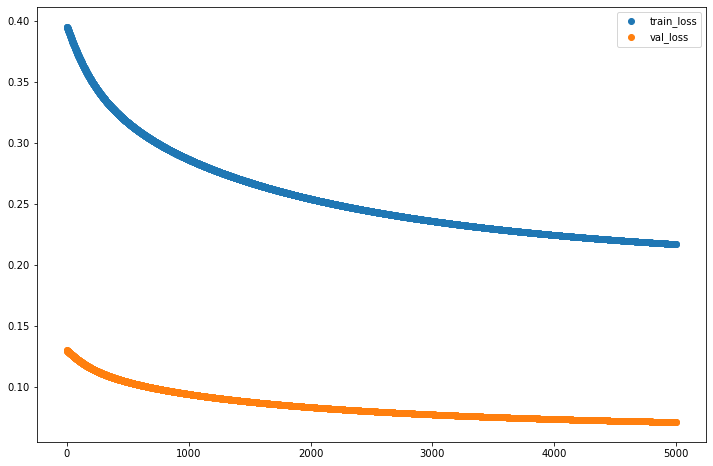

In [358]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(range(len(reg_scratch.loss)), reg_scratch.loss, label='train_loss')
plt.scatter(range(len(reg_scratch.val_loss)), reg_scratch.val_loss, label='val_loss')
plt.legend()

## 【問題7】決定領域の可視化
決定領域を可視化してください。

In [359]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(
    X, y, model, step=0.01, 
    title='decision region', xlabel='xlabel', ylabel='ylabel', 
    target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)　
        特徴量
    y : ndarray, shape(n_samples,)　　
        ラベル
    model : object　　　　　　　　　　
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)　　　　  
        推定値を計算する間隔を設定する
    title : str　                                    
        グラフのタイトルの文章を与える
    xlabel, ylabel : str　                       
        軸ラベルの文章を与える
    target_names= : list of str　          
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

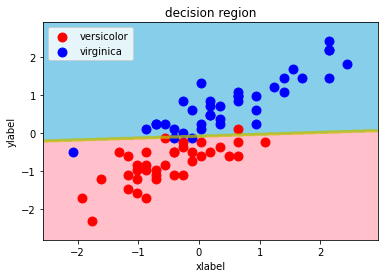

In [363]:
# スクラッチ実装(訓練データ)

decision_region(X_train_scaler, y_train, model=reg_scratch)

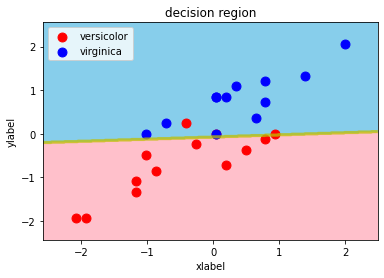

In [361]:
# スクラッチ実装(検証データ)

decision_region(X_test_scaler, y_test, model=reg_scratch)

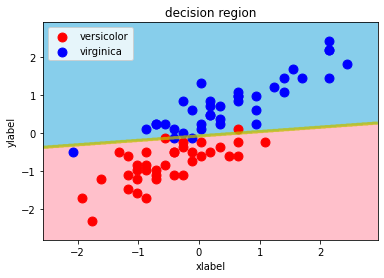

In [364]:
# scikit-learnによる実装(訓練データ)

decision_region(X_train_scaler, y_train, model=lr_sklearn)

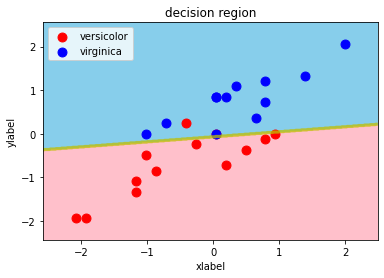

In [362]:
# scikit-learnによる実装(検証データ)

decision_region(X_test_scaler, y_test, model=lr_sklearn)